# Assignment 1
Student ID: c0896129

Student Name: Aruna Gurung

The dataset Algerian Forest Fires consists of the following features:
1. Date: in the format DD/MM/YYYY
2. Temp: temperature in degree celsius
3. RH: relative humidity
4. Ws: windspeed in km/h
5. Rain: the amount of rain in mm/m^2
6. FFMC: Fine Fuel Moisture Code
7. Region: represents region or area where the observation was recorded
8. DMC: Duff Moisture Code
9. DC: Drought Code
10. ISI: Initial Speed Index
11. BUI: Buildup Index
12. FWI: Fire Weather Index
13. Classes: represents class of the fire danger

In [117]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
# Loading the dataset
df=pd.read_csv('Algerian_forest_fires_cleaned.csv')

In [119]:
# Displaying the first five rows of the dataset
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [120]:
# checking the total number of rows and columns in the dataset
df.shape

(243, 15)

In [121]:
# Displaying descriptive summary of the data
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


## 1. Data Cleaning & Preprocessing

In [122]:
# Checking for null values in the dataset
df.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [123]:
# Displaying consice information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [124]:
# We have only one categorical feature in the dataset. Let's check the values in this column.
df[['Classes']].value_counts()

Classes      
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [125]:
# There basically is only two categories or claases in this column but due to space error we see 8 different categories.
# Chaning 'fire' values to 1 and 'not fire' to 0
df['Classes']=np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [126]:
# Checking the value counts in the 'Classes' column once again
df[['Classes']].value_counts()

Classes
1          137
0          106
Name: count, dtype: int64

In [127]:
# Checking if the above change is reflected on the dataset or not by displaying top 5 rows of the dataset
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [128]:
# The columns day, month, and year are not very important for the model so dropping them
df.drop(columns=['day', 'month', 'year'], inplace=True)

In [129]:
# Displaying the last five rows of the dataset to see the changes made above
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


## 2. Data Visualization

2.1 Boxplot

<Axes: >

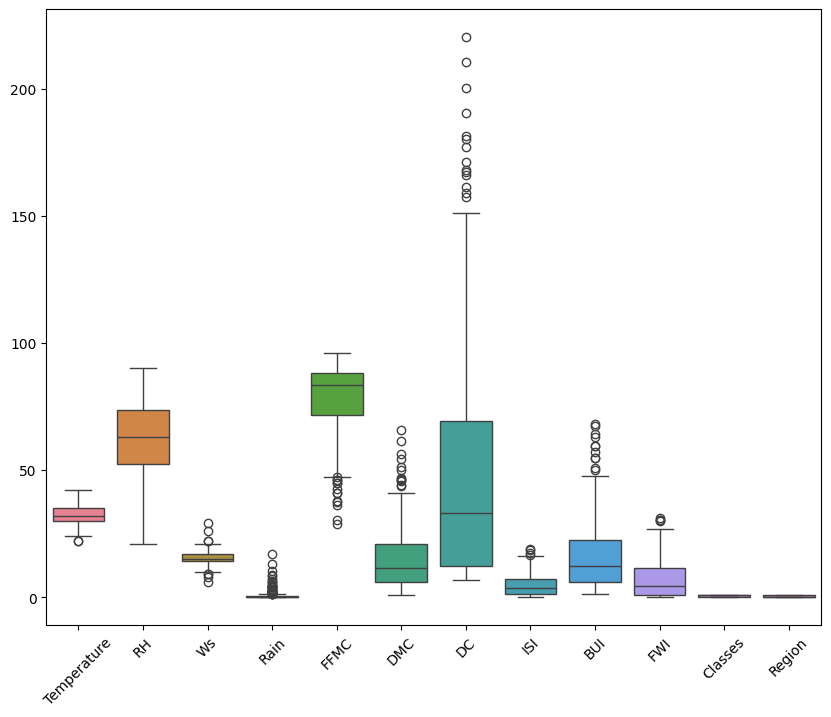

In [130]:
# Creating a boxplot
import seaborn as sns
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
sns.boxplot(df)

**Observation:** From the figure above, we can see that most features have some outliers with DC, DMC, and FFMC having the most significant numbers.

2.2 Heatmap

<Axes: >

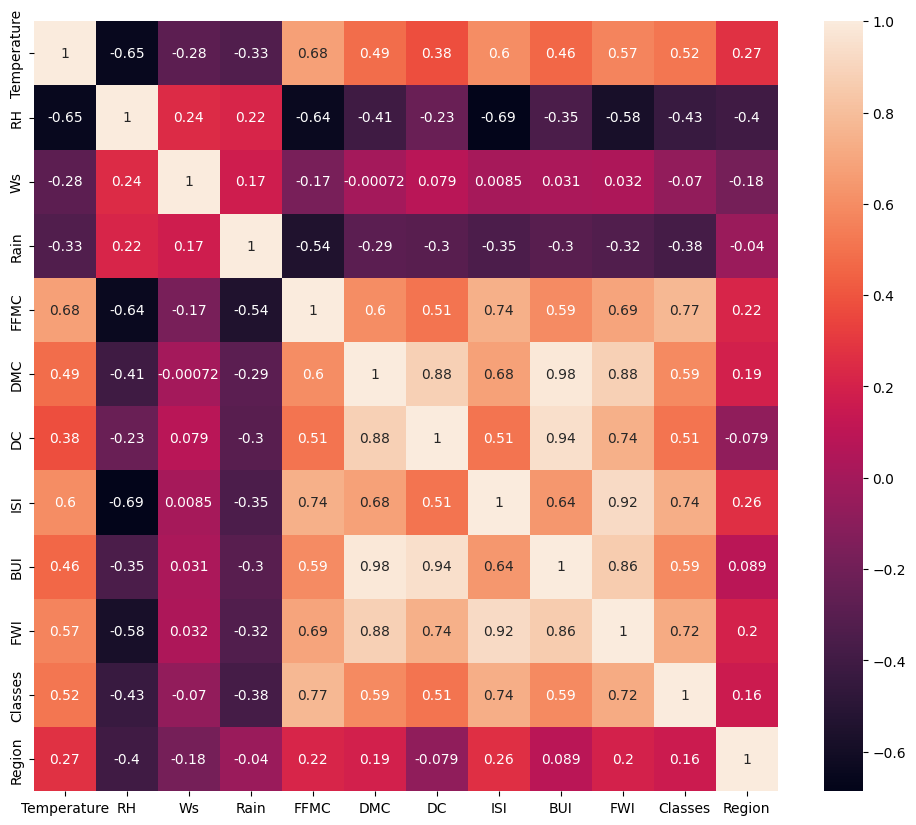

In [131]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

In [132]:
# Dropping BUI and DC due to high correlation
df.drop(columns=["BUI", "DC"], inplace=True)

In [133]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,1.3,0.5,0,0
1,29,61,13,1.3,64.4,4.1,1.0,0.4,0,0
2,26,82,22,13.1,47.1,2.5,0.3,0.1,0,0
3,25,89,13,2.5,28.6,1.3,0.0,0.0,0,0
4,27,77,16,0.0,64.8,3.0,1.2,0.5,0,0


In [134]:
# Since the indexing is not continuous so we will reset the indexing
df=df.dropna().reset_index(drop=True)

In [135]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,1.3,0.5,0,0
1,29,61,13,1.3,64.4,4.1,1.0,0.4,0,0
2,26,82,22,13.1,47.1,2.5,0.3,0.1,0,0
3,25,89,13,2.5,28.6,1.3,0.0,0.0,0,0
4,27,77,16,0.0,64.8,3.0,1.2,0.5,0,0


In [136]:
df.shape

(243, 10)

## 3. Model Development & Analysis

In [137]:
# Splitting Independent (X) and dependent (y) variables.
X=df[["Temperature","RH", "Ws", "Rain", "FFMC", "DMC", "ISI", "Classes", "Region"]]
y=df["FWI"]

In [138]:
X.shape, y.shape

((243, 9), (243,))

In [139]:
# split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((194, 9), (49, 9), (194,), (49,))

In [140]:
# Since we have features with higher magnitudes which might dominate the smaller magnitudes during model training, we need to scale the features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()# object for standard scaler

X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test)

In [141]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
115,29,65,19,0.6,68.3,5.5,1.5,0,0
207,33,37,16,0.0,92.2,61.3,13.1,1,1
158,38,43,13,0.5,85.0,13.0,4.1,1,1
132,31,42,21,0.0,90.6,18.2,13.4,1,1
84,34,64,14,0.0,88.9,40.5,9.0,1,0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,0
14,28,80,17,3.1,49.4,3.0,0.4,0,0
92,25,76,17,7.2,46.0,1.3,0.2,0,0
179,34,59,16,0.0,88.1,19.5,7.4,1,1


In [142]:
X_train_sc

array([[-0.87563202,  0.21321832,  1.28577038, ..., -0.79648833,
        -1.14434427, -1.01036297],
       [ 0.22209084, -1.65484925,  0.14504117, ...,  1.88757476,
         0.8738629 ,  0.98974332],
       [ 1.5942444 , -1.25454906, -0.99568804, ..., -0.19488798,
         0.8738629 ,  0.98974332],
       ...,
       [-1.97335488,  0.947102  ,  0.52528424, ..., -1.0972885 ,
        -1.14434427, -1.01036297],
       [ 0.49652155, -0.18708188,  0.14504117, ...,  0.56868169,
         0.8738629 ,  0.98974332],
       [-0.60120131,  1.0138187 ,  2.04625653, ..., -0.88904223,
        -1.14434427, -1.01036297]])

<ipython-input-143-f0fc295d6487>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

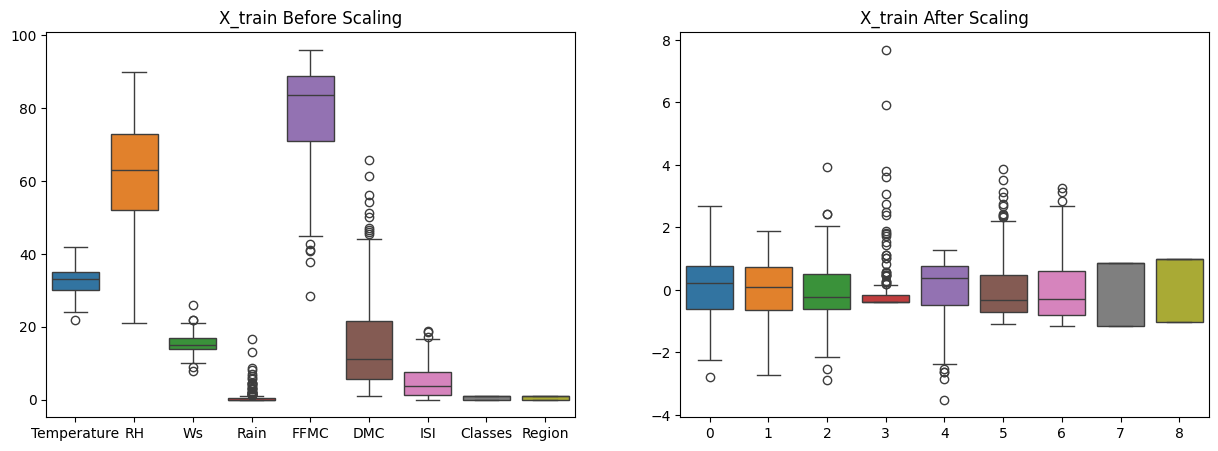

In [143]:
# Plotting boxplot to see the difference before and after scaling
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_sc)
plt.title('X_train After Scaling')

3.1 linear Regression

In [144]:
from sklearn.linear_model import LinearRegression

# creating an object for the model
lr = LinearRegression()

In [145]:
# Training the linear regression model
lr.fit(X_train, y_train)

LinearRegression()

In [146]:
y_pred = lr.predict(X_test)

In [147]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(f'R2 Score: {r2_score(y_test, y_pred)}')

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')

print(f'MSE: {mean_squared_error(y_test, y_pred)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')

R2 Score: 0.9805895859259882
MAE: 0.5049978694165678
MSE: 0.5882990110708678
RMSE: 0.7670065260940534


3.2 Multiple Linear Regression

In [148]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [149]:
X_poly.shape

(243, 54)

In [150]:
X_tr_poly, X_te_poly, y_tr, y_te = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [151]:
lr.fit(X_tr_poly, y_tr)

LinearRegression()

In [152]:
y_pred_poly= lr.predict(X_te_poly)

In [153]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(f'R2 Score: {r2_score(y_test, y_pred_poly)}')

print(f'MAE: {mean_absolute_error(y_test, y_pred_poly)}')

print(f'MSE: {mean_squared_error(y_test, y_pred_poly)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_poly))}')

R2 Score: 0.9926020976555548
MAE: 0.33183666031168596
MSE: 0.22421874240503772
RMSE: 0.47351741510216677


3.3 Regularization

1. Ridge Regularization

In [154]:
# checking computation time to run this model
%time
from sklearn.linear_model import Ridge, Lasso, ElasticNet
rd=Ridge()
rd.fit(X_train, y_train)
y_pred_rd=rd.predict(X_test)
print(f'R2_score: {r2_score(y_test, y_pred_rd)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_rd)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_rd)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rd))}')

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs
R2_score: 0.9804802007168691
MAE: 0.5031351137557426
MSE: 0.5916143040937355
RMSE: 0.7691646794372031


In [155]:
for i, col in enumerate(X.columns):
  print(f'{col}: {rd.coef_[i]}')

Temperature: -0.007000607421428919
RH: -0.011421111092934633
Ws: -0.0048868413433778785
Rain: -0.015272801733612413
FFMC: -0.0573088832574777
DMC: 0.2919131040399765
ISI: 1.133619097784732
Classes: 0.7386294874518297
Region: -0.7803535337972504


2. Lasso Regularization

In [156]:
ls = Lasso(alpha=0.009)
ls.fit(X_train, y_train)
y_pred_ls = ls.predict(X_test)
print(f'R2 Score: {r2_score(y_test, y_pred_ls)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_ls)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_ls)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ls))}')

R2 Score: 0.9804161002244111
MAE: 0.5004568870945169
MSE: 0.593557088836938
RMSE: 0.7704265629097545


In [157]:
for i, col in enumerate(X.columns):
  print(f'{col}: {ls.coef_[i]}')

Temperature: -0.00490799635717323
RH: -0.010084695226325345
Ws: -0.0030327786025695935
Rain: -0.011254810043022999
FFMC: -0.05511412873317068
DMC: 0.2918165181600315
ISI: 1.1368544326144279
Classes: 0.6609925721772322
Region: -0.7534202525843768


3. Elastic Net Regularization

In [158]:
en=ElasticNet(alpha=0.009, l1_ratio=1)
en.fit(X_train, y_train)
y_pred_en=en.predict(X_test)
print(f'R2 Score: {r2_score(y_test, y_pred_en)}')

print(f'MAE: {mean_absolute_error(y_test, y_pred_en)}')

print(f'MSE: {mean_squared_error(y_test, y_pred_en)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_en))}')

R2 Score: 0.9804161002244111
MAE: 0.5004568870945169
MSE: 0.593557088836938
RMSE: 0.7704265629097545


In [159]:
for i, col in enumerate(X.columns):
    print(f'{col} : {en.coef_[i]}')

Temperature : -0.00490799635717323
RH : -0.010084695226325345
Ws : -0.0030327786025695935
Rain : -0.011254810043022999
FFMC : -0.05511412873317068
DMC : 0.2918165181600315
ISI : 1.1368544326144279
Classes : 0.6609925721772322
Region : -0.7534202525843768


3.4. Decision Tree

In [180]:
# Importing libraries for decision tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [181]:
# Training the model
# Define the decision tree regressor
tree_reg = DecisionTreeRegressor()

In [182]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 20],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}

In [184]:
# Create the GridSearchCV object
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='r2')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_
print("Best Model:", best_model)
# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model
print('R^2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

Best Hyperparameters: {'criterion': 'squared_error', 'max_depth': 15}
Best Model: DecisionTreeRegressor(max_depth=15)
R^2: 0.9047344996297951
MAE: 1.0775510204081633
MSE: 2.88734693877551
RMSE: 1.6992195087084865


## Cross-Validation

In [162]:
from sklearn.model_selection import GridSearchCV

grid= GridSearchCV(estimator=LinearRegression(),param_grid={'fit_intercept':[True,False]},cv=5,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [163]:
grid.best_params_

{'fit_intercept': True}

In [164]:
grid.best_score_

-2.399194245274476

In [165]:
# define the model names
models={
    'Linear_reg':LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'EN':ElasticNet()
    }

# define the hyperparameter grid for each model

param_grids={
    'Linear_reg':{'fit_intercept': [True, False]},
    'Ridge':{'alpha': [0.1, 0.2, 0.3, 0.5, 0.7, 0.9]},
    'Lasso':{'alpha': [0.1, 0.2, 0.3, 0.5, 0.7, 0.9]},
    'EN': {'alpha': [0.1, 0.2, 0.3, 0.5, 0.7, 0.9], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

}


best_estimators={}
best_scores={}

for name, model in models.items():
  print(f"performing grid search for {name}.....")

  grid=GridSearchCV(estimator=model,param_grid=param_grids[name],cv=5,scoring='neg_mean_squared_error')
  grid.fit(X_train,y_train)

  best_estimators[name]=grid.best_estimator_
  best_scores[name]=mean_squared_error(y_test,grid.best_estimator_.predict(X_test))

  print(f"Best model:{name}")
  print(f"Best params:{grid.best_params_}")
  print(f'Test MSE:{best_scores[name]}\n')

performing grid search for Linear_reg.....
Best model:Linear_reg
Best params:{'fit_intercept': True}
Test MSE:0.5882990110708678

performing grid search for Ridge.....
Best model:Ridge
Best params:{'alpha': 0.9}
Test MSE:0.5912679681019816

performing grid search for Lasso.....
Best model:Lasso
Best params:{'alpha': 0.1}
Test MSE:0.7588416491755405

performing grid search for EN.....
Best model:EN
Best params:{'alpha': 0.1, 'l1_ratio': 0.1}
Test MSE:0.6724120386242546



In [166]:
# Saving the above model into a pickle file to be used in the future
import pickle
pickle.dump(scaler,open('scaler.pkl', 'wb'))
pickle.dump(lr,open('lin_reg.pkl', 'wb'))
pickle.dump(rd,open('rd.pkl', 'wb'))
pickle.dump(ls,open('ls.pkl', 'wb'))
pickle.dump(en,open('en.pkl', 'wb'))
pickle.dump(poly,open('poly.pkl', 'wb') )

## 4. Model Testing on Unseen data

In [167]:
num_samples = 10

# Generate unseen data based on the typical ranges of each feature
np.random.seed(42)  # For reproducibility
unseen_data = pd.DataFrame({
    'Temperature': np.random.uniform(20, 40, num_samples),
    'RH': np.random.uniform(10, 90, num_samples),
    'Ws': np.random.uniform(0, 20, num_samples),
    'Rain': np.random.uniform(0, 1, num_samples),
    'FFMC': np.random.uniform(80, 95, num_samples),
    'FWI':np.random.uniform(1,200,num_samples),
    'DMC': np.random.uniform(0, 200, num_samples),
    'ISI': np.random.uniform(0, 20, num_samples),
    'Classes': np.random.choice([0, 1], num_samples),  # Include Classes feature
    'Region': np.random.choice([1, 2], num_samples)    # Include Region feature
})

# Displaying the generated synthetic data
print(unseen_data)

   Temperature         RH         Ws      Rain       FFMC         FWI  \
0    27.490802  11.646760  12.237058  0.607545  81.830574  193.947341   
1    39.014286  87.592788   2.789877  0.170524  87.427654  155.251432   
2    34.639879  76.595411   5.842893  0.065052  80.515828  187.960289   
3    31.973170  26.987129   7.327237  0.948886  93.639806  179.070643   
4    23.120373  24.545997   9.121400  0.965632  83.881700  119.982096   
5    23.119890  24.672361  15.703519  0.808397  89.937834  184.452973   
6    21.161672  34.339379   3.993476  0.304614  84.675666   18.610008   
7    37.323523  51.980515  10.284689  0.097672  87.801020   40.000590   
8    32.022300  44.555601  11.848291  0.684233  88.200654   10.000230   
9    34.161452  33.298331   0.929008  0.440152  82.772817   65.740736   

          DMC        ISI  Classes  Region  
0   77.735458  15.444895        0       2  
1   54.269806   3.974314        0       1  
2  165.747502   0.110442        1       1  
3   71.350665  16.30

In [168]:
# Save the unseen data to a CSV file
unseen_data.to_csv('unseen_data.csv', index=False)

In [169]:
#model evaluation and testing
import pandas as pd
import numpy as np
import pickle

# Loading the saved models
with open('lin_reg.pkl', 'rb') as f:
    linear_model = pickle.load(f)
with open('poly.pkl', 'rb') as f:
    poly_model = pickle.load(f)
with open('rd.pkl', 'rb') as f:
    ridge_model = pickle.load(f)
with open('ls.pkl', 'rb') as f:
    lasso_model = pickle.load(f)

# Load the unseen data
unseen_data = pd.read_csv("unseen_data.csv")  # Replace "path_to_unseen_data.csv" with the actual path to your unseen data

In [170]:
# Defining the features/dependent variables, including the 'Classes' column
X_unseen = unseen_data.drop(columns=["FWI"])

In [171]:
# Generating polynomial features for Polynomial Regression
polynomial_features = PolynomialFeatures(degree=2)
X_unseen_poly = polynomial_features.fit_transform(X_unseen)

In [172]:
from sklearn.preprocessing import PolynomialFeatures

In [177]:
# Predict using the loaded models
prediction_ridge = ridge_model.predict(X_unseen)
prediction_lasso = lasso_model.predict(X_unseen)

In [178]:
# Printing the predictions
print("Ridge Regression Predictions:", prediction_ridge)
print("Lasso Regression Predictions:", prediction_lasso)

Ridge Regression Predictions: [36.40538828 16.11655965 45.55585702 35.39546075 29.14670422 43.8143162
 23.10480101 44.64392254  8.6929361  57.67765216]
Lasso Regression Predictions: [36.4419255  16.20994113 45.51454943 35.40584186 29.11171183 43.87836896
 23.04831623 44.68227414  8.74886447 57.57891572]


In [179]:
with open('predictions.pickle', 'wb') as f:
    pickle.dump({
        'ridge_regression': prediction_ridge,
        'lasso_regression': prediction_lasso
    }, f)